In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.tree import DecisionTreeClassifier
import datetime as dt
from sklearn.metrics import classification_report
from sklearn import metrics

In [3]:
weather = pd.read_csv('weather_data.csv')
price_demand = pd.read_csv('price_demand_data.csv')
display(weather)
display(price_demand)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               243 non-null    object 
 1   Minimum temperature (°C)           242 non-null    float64
 2   Maximum temperature (°C)           242 non-null    float64
 3   Rainfall (mm)                      241 non-null    float64
 4   Evaporation (mm)                   243 non-null    float64
 5   Sunshine (hours)                   243 non-null    float64
 6   Direction of maximum wind gust     240 non-null    object 
 7   Speed of maximum wind gust (km/h)  240 non-null    float64
 8   Time of maximum wind gust          240 non-null    object 
 9   9am Temperature (°C)               242 non-null    float64
 10  9am relative humidity (%)          242 non-null    float64
 11  9am cloud amount (oktas)           243 non-null    int64  

In [5]:
price_demand['Dates'] = pd.to_datetime(price_demand['SETTLEMENTDATE']).dt.date
price_demand['Time'] = pd.to_datetime(price_demand['SETTLEMENTDATE']).dt.time

In [6]:
display(price_demand)

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Dates,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00


In [7]:
price_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
 4   Dates           11664 non-null  object 
 5   Time            11664 non-null  object 
dtypes: float64(1), object(5)
memory usage: 546.9+ KB


In [8]:
data = pd.read_csv('weather_data_daily.csv', encoding ='unicode_escape')
display(data.head())
data.info()

,Date,Max of TOTALDEMAND,Max of PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,5019.64,0,15.6,29.9,0.0,2.8,9.3,NNE,31,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,4964.35,0,18.4,29.0,0.0,9.4,1.3,NNW,30,...,7,NNW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,4503.31,0,17.0,26.2,12.6,4.8,7.1,WSW,33,...,8,WSW,4,1007.7,23.5,59,4,SSW,2,1005.2
3,4/01/2021,4764.18,0,16.0,18.6,2.6,3.8,0.0,SSE,41,...,8,SSE,11,1010.0,18.2,82,8,SSW,17,1011.0
4,5/01/2021,4800.64,0,15.9,19.1,11.2,1.0,0.0,SSE,35,...,8,SSE,13,1012.5,18.2,82,8,SSE,19,1013.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               240 non-null    object 
 1   Max of TOTALDEMAND                 240 non-null    float64
 2   Max of PRICECATEGORY               240 non-null    int64  
 3   Minimum temperature (°C)           240 non-null    float64
 4   Maximum temperature (°C)           240 non-null    float64
 5   Rainfall (mm)                      240 non-null    float64
 6   Evaporation (mm)                   240 non-null    float64
 7   Sunshine (hours)                   240 non-null    float64
 8   Direction of maximum wind gust     240 non-null    object 
 9   Speed of maximum wind gust (km/h)  240 non-null    int64  
 10  Time of maximum wind gust          240 non-null    float64
 11  9am Temperature (°C)               240 non-null    float64

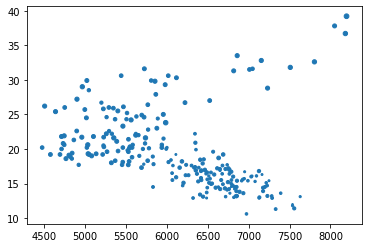

Pearson's correlation: -0.2883661163753277


In [9]:
plt.scatter(data['Max of TOTALDEMAND'],data['Maximum temperature (°C)'],data['Minimum temperature (°C)'])
plt.show()

print("Pearson's correlation: " + str(data['Max of TOTALDEMAND'].corr(data['Maximum temperature (°C)'])))

In [20]:
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression

#features = data[['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
#           'Time of maximum wind gust','9am Temperature (°C)','9am relative humidity (%)','9am cloud amount (oktas)','9am wind speed (km/h)','9am MSL pressure (hPa)','3pm Temperature (°C)',\
#            '3pm relative humidity (%)','3pm cloud amount (oktas)','3pm wind speed (km/h)','3pm MSL pressure (hPa)']]

features = data[['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
               '9am Temperature (°C)','9am relative humidity (%)','9am wind speed (km/h)','9am MSL pressure (hPa)','3pm Temperature (°C)',\
                '3pm relative humidity (%)','3pm wind speed (km/h)','3pm MSL pressure (hPa)']]


classlabel = data['Max of TOTALDEMAND']

features_train, features_test, classlabel_train, classlabel_test = train_test_split(features, classlabel, test_size=.08,random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(features_train, classlabel_train)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
r2_test = lm.score(features_test, classlabel_test)
print(r2_test)

0.5788036624492452


In [22]:
print(lm.predict(features_test.head()))
print(classlabel_test.head())

[6357.20751931 6558.24352949 5878.47364756 5396.5325054  6011.21747574]
228    6331.48
194    6486.18
88     5769.10
95     5876.07
214    6650.37
Name: Max of TOTALDEMAND, dtype: float64
